## <font color='darkolivegreen'> MODELING USING PIPLINE </font>

#### IMPORT PACKAGES

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#for easy access to path
import sys
import os

#importing packages for data manuplation and visualization
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Visualization Configuration
%matplotlib inline
sns.set()

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import mlflow


In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

In [3]:
from datetime import datetime
from pickle import dump
import mlflow
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_recall_curve, f1_score, mean_squared_error, r2_score, mean_absolute_error, auc

In [5]:
#Acessing scripts and data path
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../scripts/')

In [6]:
#import local libraries
from clean_train_test_df import CleanStoreDf
from data_preview import DataPreview
from data_loader import load_df_from_csv
from data_manipulation import DataManipulator
from plots import *
from result import ResultPicker
from data_loader import load_df_from_csv
from ml_modeling import *

##### LOAD DATA

In [15]:
#Load our clean merged data
clean_df =pd.read_csv('../data/store_train.csv')

In [8]:
clean_df.head()

,DayOfWeek,WeekDay,Year,Month,Season,Day,MonthTiming,Sales,Customers,Open,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer,CompetitionOpenSince
0,0.501484,0.630672,1.502077,0.346724,0.389712,1.740766,1.205894,-0.063134,-0.067027,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.093996,0.595717
1,0.000831,0.630672,1.502077,0.346724,0.389712,1.626969,1.205894,-0.136239,-0.092863,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.207208,0.595717
2,-0.499823,0.630672,1.502077,0.346724,0.389712,1.513173,1.205894,-0.207840,-0.158887,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.227101,0.595717
3,-1.000476,0.630672,1.502077,0.346724,0.389712,1.399377,1.205894,-0.138946,-0.052674,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.303632,0.595717
4,-1.501129,0.630672,1.502077,0.346724,0.389712,1.285581,1.205894,0.189274,0.096598,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,0.097227,0.595717


## <font color='darkolivegreen'>Random Forest</font>

In [10]:
#separation the data
X = clean_df.drop(['Customers', 'Sales', 'SalesPerCustomer'], axis = 1)
y = clean_df['Sales']

In [16]:
# Splitting Data (60,20,20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Training and testing split was successful.


> <font color='green'>`Spliting complete.`</font>

In [12]:
# Define the Pipeline
model_pipeline = Pipeline(steps=[('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])

In [13]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    print("RMSE Score is: {:.5%}".format(rmse))
    print("R2 Square Score is: {:.5%}".format(r2))
    print("MAE Score is: {:.5%}".format(mae))
    return {f'RMSE Score': rmse, f'R2_Squared': r2, f'MAE Score': mae}

In [14]:
# Fit the pipeline with the data
mlflow.autolog(log_input_examples=True, disable_for_unsupported_versions=True, silent=True)
with mlflow.start_run() as run:
    best_model = model_pipeline.fit(X_train, y_train)

    train_score = best_model.score(X_train, y_train)
    valid_score = best_model.score(X_valid, y_valid)
    valid_metrics = eval_metrics(y_valid, best_model.predict(X_valid))
    test_score = best_model.score(X_test, y_test)
    test_metrics = eval_metrics(y_test, best_model.predict(X_test))

    mlflow.log_metric("Valid Score", valid_score)
    mlflow.log_metrics(valid_metrics)
    mlflow.log_metric("Test Score", test_score)
    mlflow.log_metrics(test_metrics)

RMSE Score is: 52.93644%
R2 Square Score is: 71.90404%
MAE Score is: 37.50832%
RMSE Score is: 52.90944%
R2 Square Score is: 72.05642%
MAE Score is: 37.50892%


>`model complete`

In [22]:
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{
     'random_forest': [RandomForestRegressor(max_depth=10, random_state=2)],
     'random_forest__bootstrap': [True, True],
     'random_forest__ccp_alpha': [0.0],
     'random_forest__criterion': ['mse'],
     'random_forest__max_depth': [5,8,15],
     'random_forest__max_features': ['auto'],
     'random_forest__min_impurity_decrease': [0.0],
     'random_forest__min_samples_leaf': [1,5],
     'random_forest__min_samples_split': [2],
     'random_forest__min_weight_fraction_leaf': [0.0],
     'random_forest__n_estimators': [100],
     'random_forest__oob_score': [False, True],
     'random_forest__random_state': [2],
     'random_forest__verbose': [0],
     'random_forest__warm_start': [True, False]
}]

    
# create a gridsearch of the pipeline, the fit the best model
grid_search_pipeline = GridSearchCV(
    model_pipeline, grid_param, cv=3, verbose=0, n_jobs=-1)  # Fit grid search

In [26]:
def generate_model_name(mse_score: float) -> str:
    now = datetime.now()
    dt_string = now.strftime("%d-%m-%Y-%H-%M-%S-")
    dt_string = dt_string + "{:.2%}".format(mse_score)
    return dt_string

In [27]:
valid_metrics

{'RMSE Score': 0.5293644157874668,
 'R2_Squared': 0.7190404274836455,
 'MAE Score': 0.3750831964535372}

Text(0.5, 1.0, 'Valid Metrics')

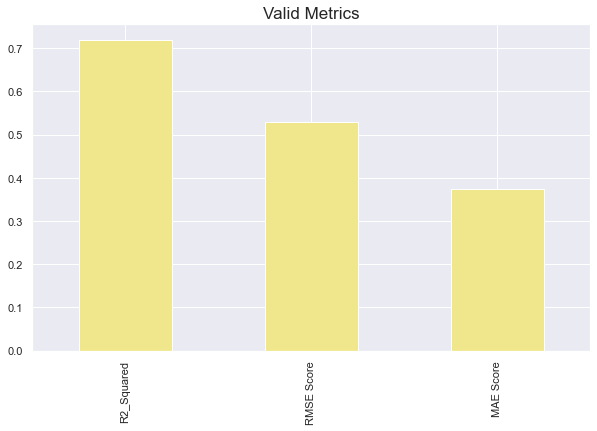

In [51]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(valid_metrics, index = valid_metrics.keys())
feat_importances.nlargest(10).plot(kind='bar',color='khaki');
plt.title('Valid Metrics',size=17)

In [33]:
test_metrics

{'RMSE Score': 0.52909444368583,
 'R2_Squared': 0.7205641551568762,
 'MAE Score': 0.3750892205643945}

Text(0.5, 1.0, 'Test Metrics')

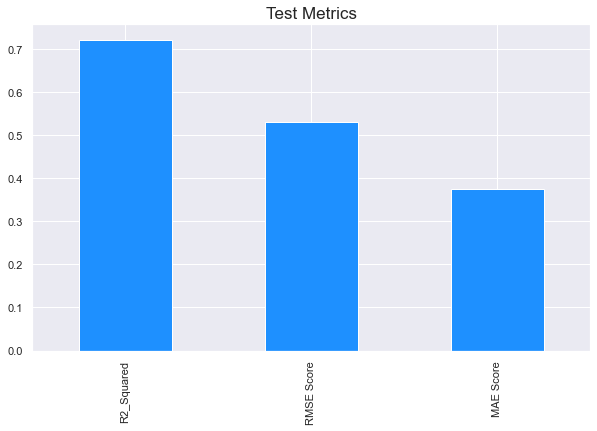

In [45]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(test_metrics, index = test_metrics.keys())
feat_importances.nlargest(10).plot(kind='bar',color='dodgerblue');
plt.title('Test Metrics',size=17)

In [53]:
def save_model(model, mse_score) -> None:
    try:
        file_name = '../models/' + generate_model_name(mse_score=mse_score) +'.pkl'
        with open(file_name, 'wb') as handle:
            dump(model, handle)
    except Exception as e:
        print('Error while producing model')

In [54]:
save_model(best_model, test_metrics['RMSE Score'])

>`Model Saved.`

In [56]:
best_model.get_params()

{'memory': None,
 'steps': [('random_forest',
   RandomForestRegressor(max_depth=10, random_state=2))],
 'verbose': False,
 'random_forest': RandomForestRegressor(max_depth=10, random_state=2),
 'random_forest__bootstrap': True,
 'random_forest__ccp_alpha': 0.0,
 'random_forest__criterion': 'mse',
 'random_forest__max_depth': 10,
 'random_forest__max_features': 'auto',
 'random_forest__max_leaf_nodes': None,
 'random_forest__max_samples': None,
 'random_forest__min_impurity_decrease': 0.0,
 'random_forest__min_impurity_split': None,
 'random_forest__min_samples_leaf': 1,
 'random_forest__min_samples_split': 2,
 'random_forest__min_weight_fraction_leaf': 0.0,
 'random_forest__n_estimators': 100,
 'random_forest__n_jobs': None,
 'random_forest__oob_score': False,
 'random_forest__random_state': 2,
 'random_forest__verbose': 0,
 'random_forest__warm_start': False}

***
***